**DATA CLEANING**

***Import Dataset***

In [3]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',header=None)
data.columns=['Sample code','Clump Thickness','Uniformity of cell Size','Uniformity of cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei', 'Bland Chromatin','Normal Nucleoli', 'Mitoses','Class']
data = data.drop(['Sample code'], axis=1)
print(' Number of Instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

 Number of Instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of cell Size,Uniformity of cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


***Missing Values***

In [4]:
import numpy as np
data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
  print('\t %s: %d' % (col, data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	 Clump Thickness: 0
	 Uniformity of cell Size: 0
	 Uniformity of cell Shape: 0
	 Marginal Adhesion: 0
	 Single Epithelial Cell Size: 0
	 Bare Nuclei: 16
	 Bland Chromatin: 0
	 Normal Nucleoli: 0
	 Mitoses: 0
	 Class: 0


In [5]:
data2 = data['Bare Nuclei']

print(' Before replacing missing values:')
print(data2[20:25])
data2 = data2.fillna(data2.median())

print('\n After replacing missing values:')
print(data2.shape[0])

 Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

 After replacing missing values:
699


In [6]:
print('Number of rows in original data = %d' % (data.shape[0]))
data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


***Outliers***

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


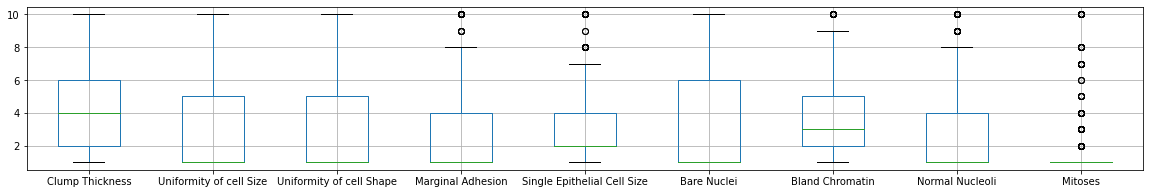

In [7]:
data2 = data.drop(['Class'], axis = 1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize = (20,3))

In [14]:
Z = (data2-data2.mean())/data2.std()
Z[20:25]

,Clump Thickness,Uniformity of cell Size,Uniformity of cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


In [15]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z>-3).sum(axis=1)==9) & ((Z<=3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 699
Number of rows after discarding missing values = 632


***Dublicate Data***

In [19]:
dups = data.duplicated()
print('Number of dublicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

Number of dublicate rows = 236


,Clump Thickness,Uniformity of cell Size,Uniformity of cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1,2,1,1,2
28,2,1,1,1,2,1,2,1,1,2


In [20]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463


***Aggregation***

Text(0.5, 1.0, 'Daily Precipitation (variance = 0.0530)')

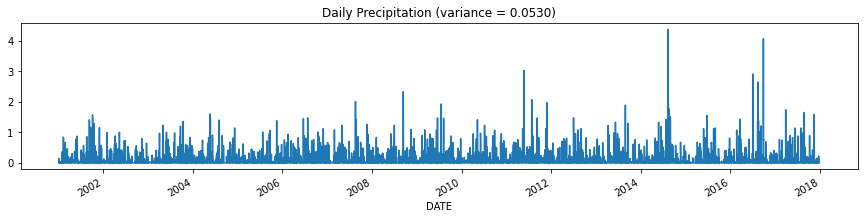

In [22]:
daily = pd.read_csv('DTW_prec.csv', header = 'infer')   #upload DTW_prec.csv file to colab
daily.index = pd.to_datetime(daily['DATE'])
daily= daily['PRCP']
ax = daily.plot(kind = 'line', figsize = (15,3))
ax.set_title('Daily Precipitation (variance = %.4f)' % (daily.var()))

Text(0.5, 1.0, 'monthly Precipitation (variance = 23.6997)')

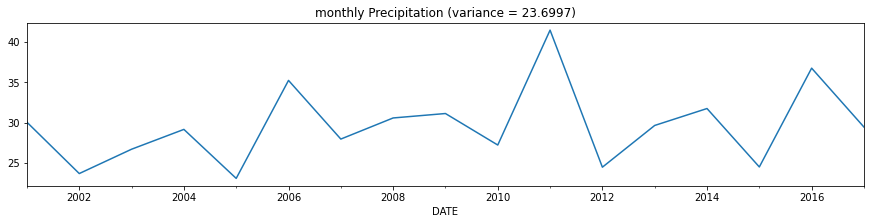

In [25]:
monthly = daily.groupby(pd.Grouper(freq='Y')).sum()
ax = monthly.plot(kind = 'line', figsize=(15,3))
ax.set_title('monthly Precipitation (variance = %.4f)' % (monthly.var()))

Text(0.5, 1.0, 'Annual Precipitation (variance = 23.6997)')

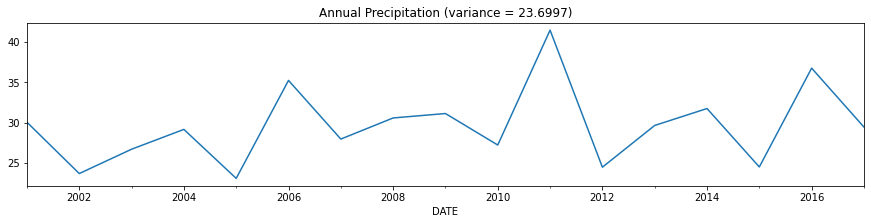

In [26]:
annual = daily.groupby(pd.Grouper(freq='Y')).sum()
ax = annual.plot(kind = 'line', figsize=(15,3))
ax.set_title('Annual Precipitation (variance = %.4f)' % (annual.var()))

***Sampling***

In [27]:
data.head()

,Clump Thickness,Uniformity of cell Size,Uniformity of cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [29]:
sample = data.sample(n=3)
sample

,Clump Thickness,Uniformity of cell Size,Uniformity of cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
322,3,1,1,1,2,1,3,1,1,2
446,1,1,1,1,2,1,1,1,1,2
572,3,1,1,1,2,1,2,1,1,2


In [30]:
sample = data.sample(frac = 0.01, random_state = 1)
sample

,Clump Thickness,Uniformity of cell Size,Uniformity of cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
584,5,1,1,6,3,1,1,1,1,2
417,1,1,1,1,2,1,2,1,1,2
606,4,1,1,2,2,1,1,1,1,2
349,4,2,3,5,3,8,7,6,1,4
134,3,1,1,1,3,1,2,1,1,2
502,4,1,1,2,2,1,2,1,1,2
117,4,5,5,10,4,10,7,5,8,4


In [31]:
sample = data.sample(frac= 0.01, replace= True, random_state = 1)
sample

,Clump Thickness,Uniformity of cell Size,Uniformity of cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
37,6,2,1,1,1,1,7,1,1,2
235,3,1,4,1,2,NaN,3,1,1,2
72,1,3,3,2,2,1,7,2,1,2
645,3,1,1,1,2,1,2,1,1,2
144,2,1,1,1,2,1,2,1,1,2
129,1,1,1,1,10,1,1,1,1,2
583,3,1,1,1,2,1,1,1,1,2


***Discretization***

In [32]:
data['clump Thickness'].hist(bins = 10)
data['clump Thickness'].value_counts(sort = False)

KeyError: ignored

In [33]:
bins = pd.cut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.991, 3.25]    303
(3.25, 5.5]      210
(5.5, 7.75]       57
(7.75, 10.0]     129
Name: Clump Thickness, dtype: int64

In [34]:
bins = pd.qcut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.999, 2.0]    195
(2.0, 4.0]      188
(4.0, 6.0]      164
(6.0, 10.0]     152
Name: Clump Thickness, dtype: int64